In [4]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from pprint import pprint
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import numpy as np
from sklearn.dummy import DummyClassifier
import itertools
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter('ignore')
%run -i 'functions.py'

In [2]:
pd.set_option('display.max_columns', None)
df= pd.read_csv('final1.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
EWR = df[df['ORIGIN_STATE_ABR'] == 'NJ']

In [3]:
EWR

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,delayed,ontime,cancel,class,delay_carrier,delay_weather,delay_nas,delay_security,delay_late_aircraft
25666,1,1,26,6,2019-01-26,UA,758,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,613.0,13.0,907.0,-22.0,0.0,322.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
25667,1,1,26,6,2019-01-26,UA,703,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,754.0,-6.0,1032.0,-57.0,0.0,319.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25669,1,1,26,6,2019-01-26,UA,600,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1950.0,-10.0,2228.0,-55.0,0.0,314.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25673,1,1,26,6,2019-01-26,UA,204,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,855.0,-5.0,1148.0,-27.0,0.0,302.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
25675,1,1,25,5,2019-01-25,UA,2394,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1357.0,-3.0,1702.0,-21.0,0.0,332.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35565,4,12,8,7,2019-12-08,UA,2023,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1259.0,-1.0,1616.0,7.0,0.0,345.0,2454.0,NaN,NaN,NaN,NaN,NaN,False,True,False,3,False,False,False,False,False
35568,4,12,8,7,2019-12-08,UA,1871,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1903.0,3.0,2227.0,2.0,0.0,337.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False
35569,4,12,8,7,2019-12-08,UA,1702,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1059.0,-1.0,1424.0,15.0,0.0,355.0,2454.0,0.0,0.0,15.0,0.0,0.0,False,True,False,3,False,False,True,False,False
35570,4,12,8,7,2019-12-08,UA,1460,11618,EWR,"Newark, NJ",NJ,New Jersey,12892,LAX,"Los Angeles, CA",CA,California,1603.0,3.0,1912.0,-2.0,0.0,341.0,2454.0,NaN,NaN,NaN,NaN,NaN,True,False,False,2,False,False,False,False,False


In [5]:
airlines = {'OP_UNIQUE_CARRIER' : {'AS':1, 'UA':2 }}

In [6]:
airline=EWR.replace(airlines,inplace=True)

In [7]:
percentage(EWR)

percentage of ontime flights is 57.88092835519677
percentage of delay flights is 41.41271442986882
percentage of cancelled flights 0.7063572149344097


3    2868
2    2052
1      35
Name: class, dtype: int64


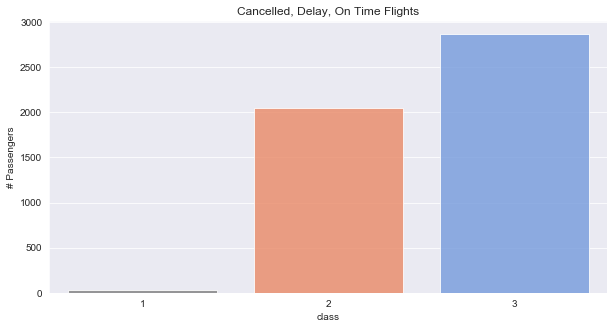

In [7]:
airportgraph(EWR)

We can see there is a class imbalance. Therefore we will need to SMOTE before we model so we the results are now flawed by any reason.

In [8]:
X = EWR[['QUARTER','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID','DEP_TIME','DEP_DELAY','ARR_TIME','ARR_DELAY','CANCELLED','AIR_TIME','DISTANCE']]
y= EWR['class']

[0.01440949 0.02997202 0.03411551 0.02749544 0.01019679 0.03932268
 0.         0.17376414 0.39314745 0.07578999 0.1362171  0.01188647
 0.05368292 0.        ]


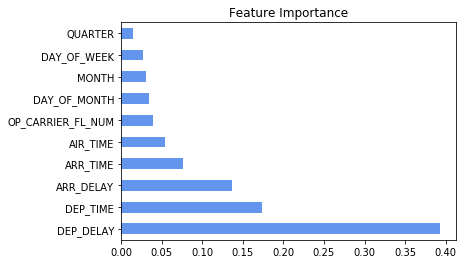

In [9]:
featureimport(X,y)

Calculating feature importance, it shows departure delay has an influence in classifying therefore we must not include departure delay in our models because the models will only focus on the variable with the highest influence.

# Baseline Model

In [8]:
X = EWR[['QUARTER','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK','OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID','DEP_TIME','ARR_TIME','ARR_DELAY','CANCELLED','AIR_TIME','DISTANCE']]
y= EWR['class']
X_r, y_r = SMOTE().fit_sample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=42)


Here we are SMOTing our X and Y values since we identified class imbalance.

Here is where we create the baseline model, we will use the results to see how model perform.

In [95]:
dummy_clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
dummy_pred = dummy_clf.predict(X_test)
dummy_clf.score(X_train, y_train)

0.335318901641726

In [97]:
cm = confusion_matrix(y_test,dummy_pred)
classes = ['Delay', 'On time','Cancel']

Confusion Matrix, without normalization
[[560   0   0]
 [585   0   0]
 [576   0   0]]


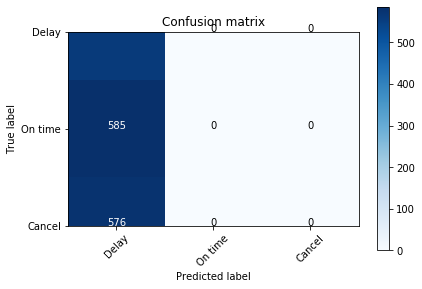

In [98]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [99]:
datatable(y_test,dummy_pred)

,Micro,Macro,Weighted
Precison,0.325392,0.108464,0.105880
Recall,0.325392,0.333333,0.325392
F1 Score,0.325392,0.163671,0.159772


We have identified our baseline model. We will compare how the other models perform against our baseline. As we can see the F1 Score for the baseline is only .32

# Logistic Regression

In [158]:
logistic_regression= LogisticRegression(random_state=2)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.8814642649622313


In [159]:
y_test.value_counts()

2    585
3    576
1    560
Name: class, dtype: int64

In [160]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Delay', 'On time','Cancel']

Confusion Matrix, without normalization
[[560   0   0]
 [  0 440 145]
 [  0  59 517]]


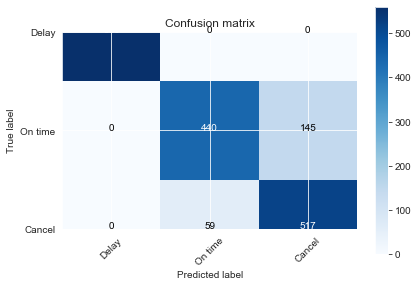

In [161]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [162]:
datatable(y_test,y_pred)

,Micro,Macro,Weighted
Precison,0.881464,0.887577,0.886501
Recall,0.881464,0.883235,0.881464
F1 Score,0.881464,0.882342,0.880879


The evaluation metrics we are looking at is F1 score. We want a balance between precison and recall. Since recall calculates true positives and precison takes into account how many are actually positive. I was to assure the flight is being classified correctly as ontime, delayed or if it get cancelled.

## Hyperparameter Tuning Logistic Regression

In [163]:
clf = LogisticRegression(random_state=2)
grid_values = {'penalty': ['l1', 'l2'],'C':[10,50,100,110,120,140,200,1000,2000],'max_iter':[150,250,350,450],'dual':[True,False]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, verbose=0, cv=5)
grid_clf_acc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=2, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10, 50, 100, 110, 120, 140, 200, 1000, 2000],
                         'dual': [True, False],
                         'max_iter': [150, 250, 350, 450],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [164]:
grid_clf_acc.best_params_

{'C': 200, 'dual': False, 'max_iter': 150, 'penalty': 'l2'}

In [272]:
refclf = LogisticRegression(C=200,penalty='l2', dual=False, max_iter=150)
refclf.fit(X_train,y_train)
refpred=refclf.predict(X_test)

In [273]:
cm = confusion_matrix(y_test,refpred)
classes = ['Delay', 'On time','Cancel']

Confusion Matrix, without normalization
[[560   0   0]
 [  0 441 144]
 [  0  59 517]]


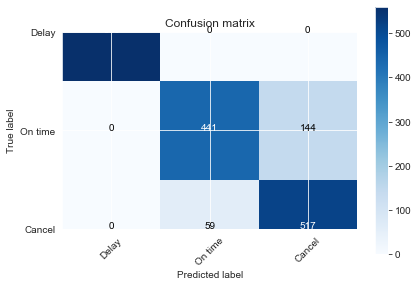

In [274]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [275]:
datatable(y_test,refpred)

,Micro,Macro,Weighted
Precison,0.882045,0.888049,0.886977
Recall,0.882045,0.883805,0.882045
F1 Score,0.882045,0.882932,0.881478


After tuning the model, we can see F1 Score increases a tad bit to .882 from .881. Our tunes model did improve compared to the default model. Let's try and do better.

# Random Forest

In [202]:

rfc2 = RandomForestClassifier(random_state=8)
rfc2.fit(X_train, y_train)
test_pred = rfc2.predict(X_test)
accuracy_score(y_test, test_pred)

0.9244625217896572

In [220]:
cm = confusion_matrix(y_test,test_pred)
classes = ['Delay', 'On time','Cancel']

Confusion Matrix, without normalization
[[560   0   0]
 [  0 496  89]
 [  0  41 535]]


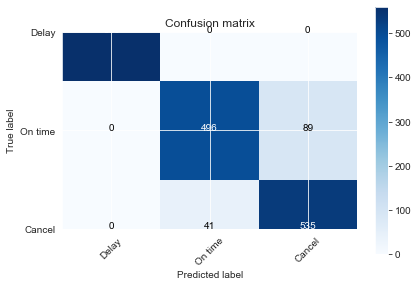

In [221]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [225]:
datatable(y_test,test_pred)

,Micro,Macro,Weighted
Precison,0.924463,0.927007,0.926311
Recall,0.924463,0.925561,0.924463
F1 Score,0.924463,0.925267,0.924357


The default model is performing pretty well. I will still tune it to see if I can improve it even more?

## Hypyerparameter Tuning Random Forest

In [204]:
param_grid = {
    'n_estimators': [50, 100],
    'criterion':['gini', 'entropy'],
    'min_samples_leaf':[2,4],
    'min_samples_split':[3,5],
    'bootstrap': [True, False]
}

In [205]:

# Instantiate a GridSearch to tune model
gridsearch = GridSearchCV(estimator=rfc2, param_grid=param_grid, cv=5, n_jobs=-1)
gridsearch.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=8,
                                   

In [206]:
gridsearch.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [255]:
rfc_ref = RandomForestClassifier(criterion = 'entropy', min_samples_split=3, min_samples_leaf=2, n_estimators=100,
                                bootstrap= False,random_state=2, n_jobs=-1)
rfc_ref.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [256]:
refined_pred = rfc_ref.predict(X_test)


In [222]:
cm = confusion_matrix(y_test,refined_pred)
classes = ['Delay', 'On time','Cancel']

Confusion Matrix, without normalization
[[560   0   0]
 [  0 510  75]
 [  0  30 546]]


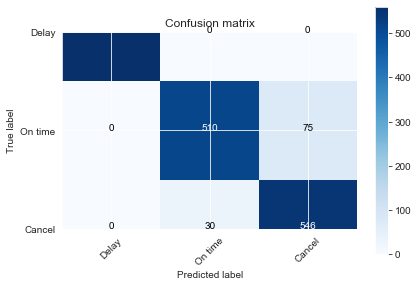

In [223]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [257]:
datatable(y_test,refined_pred)

,Micro,Macro,Weighted
Precison,0.937827,0.939932,0.939379
Recall,0.937827,0.938746,0.937827
F1 Score,0.937827,0.938506,0.937759


After tuning the model, we can see F1 Score increases a tad bit to .93 from .92. Again our model did improve compared to the default. Random forest did perfom better than Logistic Regression but lets try more. 

# KNN

In [9]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)

y_predknn = model.predict(X_test)

In [10]:
y_test.value_counts()

2    585
3    576
1    560
Name: class, dtype: int64

In [67]:
cm = confusion_matrix(y_test,y_predknn)
classes = ['Delay', 'On time','Cancel']

Confusion Matrix, without normalization
[[560   0   0]
 [  0 521  64]
 [  0  59 517]]


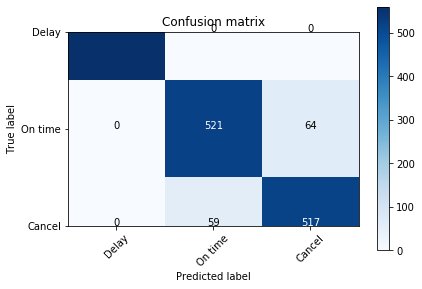

In [68]:
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [69]:
datatable(y_test,y_predknn)

,Micro,Macro,Weighted
Precison,0.92853,0.929374,0.928554
Recall,0.92853,0.929389,0.928530
F1 Score,0.92853,0.929370,0.928531


KNN default model performed nearly as well as the tuned Random Forest model! Calculating all kscored from a range of 1-12 we would be able to see whihc value returns the highest f1 score.

In [11]:
kscores()

[0.94712376525276, 0.9476286451306297, 0.9459580419938554, 0.9465268367413563, 0.9413137995502705, 0.9412975093511915, 0.931433380859355, 0.9320051703991129, 0.927949294566369, 0.9302523957495953, 0.9262067893119117]


In [16]:
k_range = list(range(1, 12))
k_scores = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
        score = f1_score(y_test, y_predict, average='weighted')
        k_scores.append(score)
print(k_scores)  

[0.94712376525276, 0.9476286451306297, 0.9459580419938554, 0.9465268367413563, 0.9413137995502705, 0.9412975093511915, 0.931433380859355, 0.9320051703991129, 0.927949294566369, 0.9302523957495953, 0.9262067893119117]


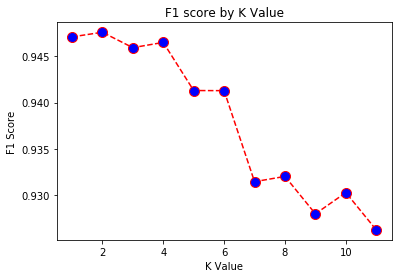

In [17]:
kvalvisual()

According to the visual it seems the Kvalue=1 returns the highest F1 score. Lets plug it in and evaluate. 

## Hyperparameter Tunning KNN

In [89]:
model2 = KNeighborsClassifier(n_neighbors=1)
model2.fit(X_train, y_train)

y_predknnbest = model2.predict(X_test)

In [90]:
cm1 = confusion_matrix(y_test,y_predknnbest)
classes = ['Delay', 'On time','Cancel']

Confusion Matrix, without normalization
[[560   0   0]
 [  0 532  53]
 [  0  42 534]]


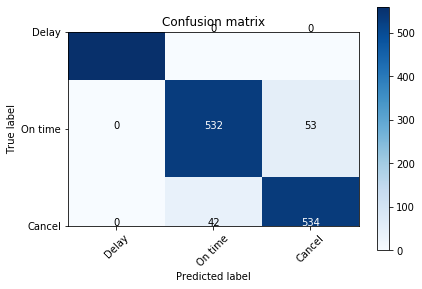

In [91]:
plot_confusion_matrix(cm1, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [92]:
datatable(y_test,y_predknnbest)

,Micro,Macro,Weighted
Precison,0.9448,0.945513,0.944909
Recall,0.9448,0.945495,0.944800
F1 Score,0.9448,0.945449,0.944799


Wow! So far KNN is the model performing the best with an F1 score of .944! 

# XGBoost

In [107]:
xgb = XGBClassifier(n_jobs = 3)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=3,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [108]:
prediction = xgb.predict(X_test)

In [109]:
y_train.value_counts()

1    2308
3    2292
2    2283
Name: class, dtype: int64

In [110]:
cm2 = confusion_matrix(y_test,prediction)
classes = ['Delay', 'On time','Cancel']

Confusion Matrix, without normalization
[[560   0   0]
 [  0 503  82]
 [  0  37 539]]


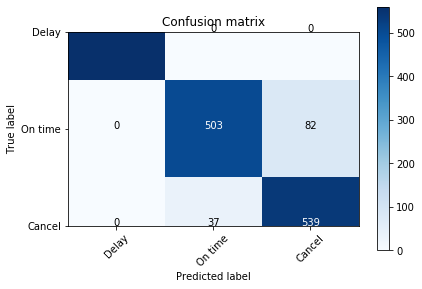

In [111]:
plot_confusion_matrix(cm2, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [112]:
datatable(y_test,prediction)

,Micro,Macro,Weighted
Precison,0.930854,0.933145,0.932515
Recall,0.930854,0.931864,0.930854
F1 Score,0.930854,0.931602,0.930771


XGBoost model performed fairly well too. F1 score was pretty high indicating the model can be categorize as successful. I will not perforn a hyper tuning model for this because I am satisfied with my KNN model result.